In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', family='serif')
rc('figure', facecolor='w')
from astropy.io import fits, ascii
from astropy.table import Table
import os
import math

import TheCannon
from TheCannon import dataset, model
import apogee_tools as ap
AP_PATH = os.environ['APOGEE_DATA']
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2016/bin/x86_64-darwin'

/home/jess/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
parrange = [[2300, 3000], [3.5, 5.0], [-0.5, 0.0]]
mdls = ap.readModels(parrange=parrange, grid='BTSETTLb')

In [3]:
wl = mdls[0].wave
tr_label = np.array([md.params for md in mdls])
tr_flux = np.array([md.flux for md in mdls])
tr_ivar = 100*np.ones([len(tr_label),len(wl)])
tr_ID = np.array(['BTSETTL_{}_{}_{}'.format(lbl[0], lbl[1], lbl[2]) for lbl in tr_label])

In [4]:
# pseudo_tr_flux, pseudo_tr_ivar = ds.continuum_normalize_training_q(q=0.90, delta_lambda=50)
# contmask = ds.make_contmask(pseudo_tr_flux, pseudo_tr_ivar, frac=0.07)
# ds.set_continuum(contmask)
# cont = ds.fit_continuum(3, "sinusoid")
# norm_tr_flux, norm_tr_ivar, norm_test_flux, norm_test_ivar = ds.continuum_normalize(cont)

# ds.tr_flux = norm_tr_flux
# ds.tr_ivar = norm_tr_ivar
# ds.test_flux = norm_test_flux
# ds.test_ivar = norm_test_ivar

# np.save('norm_wave_lowres', ds.wl)
# np.save('norm_ivar_lowres', norm_tr_ivar)
# np.save('norm_flux_lowres', norm_tr_flux)

In [4]:
wl = np.load('norm_spec/norm_wave_lowres.npy')
tr_flux = np.load('norm_spec/norm_flux_lowres.npy')
tr_ivar = np.load('norm_spec/norm_ivar_lowres.npy')

In [5]:
plt.plot(ds.wl, ds.tr_flux[30]);

NameError: name 'ds' is not defined

In [6]:
ds = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label, tr_ID, tr_flux, tr_ivar) 
ds.set_label_names(['T_{eff}', '\log g', '[Fe/H]'])

Loading dataset
This may take a while...


In [5]:
# md, d, f = ap.fitCannonModel(ds)

In [7]:
md = model.CannonModel(2, None)
md.fit(ds)

ValueError: operands could not be broadcast together with shapes (154,1) (64,10) 

In [14]:
len(ds.tr_ivar), len(ds.tr_flux), len(ds.tr_ID)

(154, 154, 154)

In [22]:
ds.tr_ivar = 100*np.ones([len(tr_label),len(wl)])

In [7]:
ds.tr_label

array([[ 2.3e+03,  3.5e+00, -5.0e-01],
       [ 2.3e+03,  3.5e+00,  0.0e+00],
       [ 2.3e+03,  4.0e+00, -5.0e-01],
       [ 2.3e+03,  4.0e+00,  0.0e+00],
       [ 2.3e+03,  4.5e+00, -5.0e-01],
       [ 2.3e+03,  4.5e+00,  0.0e+00],
       [ 2.3e+03,  5.0e+00, -5.0e-01],
       [ 2.3e+03,  5.0e+00,  0.0e+00],
       [ 2.4e+03,  3.5e+00, -5.0e-01],
       [ 2.4e+03,  3.5e+00,  0.0e+00],
       [ 2.4e+03,  4.0e+00, -5.0e-01],
       [ 2.4e+03,  4.0e+00,  0.0e+00],
       [ 2.4e+03,  4.5e+00, -5.0e-01],
       [ 2.4e+03,  4.5e+00,  0.0e+00],
       [ 2.4e+03,  5.0e+00, -5.0e-01],
       [ 2.4e+03,  5.0e+00,  0.0e+00],
       [ 2.5e+03,  3.5e+00, -5.0e-01],
       [ 2.5e+03,  3.5e+00,  0.0e+00],
       [ 2.5e+03,  4.0e+00, -5.0e-01],
       [ 2.5e+03,  4.0e+00,  0.0e+00],
       [ 2.5e+03,  4.5e+00, -5.0e-01],
       [ 2.5e+03,  4.5e+00,  0.0e+00],
       [ 2.5e+03,  5.0e+00, -5.0e-01],
       [ 2.5e+03,  5.0e+00,  0.0e+00],
       [ 2.6e+03,  3.5e+00, -5.0e-01],
       [ 2.6e+03,  3.5e+0

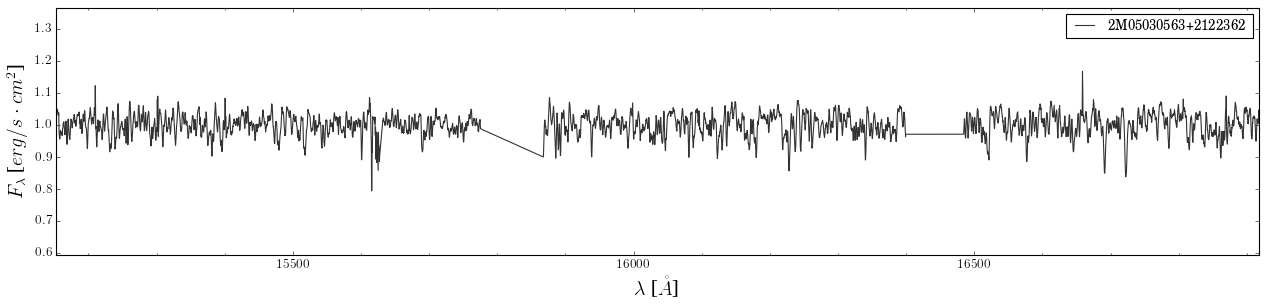

In [8]:
data = ap.Spectrum(id='2M05030563+2122362', type='aspcap')
data.plot()